In [ ]:
pip -q install datasets

     |████████████████████████████████| 342 kB 25.3 MB/s 
     |████████████████████████████████| 1.1 MB 39.3 MB/s 
     |████████████████████████████████| 212 kB 47.4 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 136 kB 50.6 MB/s 
     |████████████████████████████████| 127 kB 59.4 MB/s 
     |████████████████████████████████| 144 kB 59.8 MB/s 
     |████████████████████████████████| 94 kB 2.9 MB/s 
     |████████████████████████████████| 271 kB 49.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from datasets import list_datasets, load_dataset

In [ ]:
dataset = load_dataset('glue','stsb')  

Generating train split:   0%|          | 0/5749 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1379 [00:00<?, ? examples/s]

Dataset glue downloaded and prepared to /root/.cache/huggingface/datasets/glue/stsb/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
columns = ['answer1', 'answer2']

In [ ]:
s = []
for i,j in zip(dataset['train']['sentence1'],dataset['train']['sentence2']):
  s.append([i,j])

for i,j in zip(dataset['validation']['sentence1'],dataset['validation']['sentence2']):
  s.append([i,j])

for i,j in zip(dataset['test']['sentence1'],dataset['test']['sentence2']):
  s.append([i,j])

In [ ]:
labels = []
for i in dataset['train']['label']:
  labels.append(i)

In [ ]:
labels.extend(dataset['validation']['label'])
labels.extend(dataset['test']['label'])

In [ ]:
df = pd.DataFrame(s, columns= columns)
df['is_duplicate'] = labels

In [ ]:
new_df = df.drop(df[df['is_duplicate'] == -1].index)

In [ ]:
new_df['is_duplicate'] = new_df['is_duplicate'].apply(lambda x : 1 if x>=3.5 else 0)

In [ ]:
new_df.head()

,answer1,answer2,is_duplicate
0,A plane is taking off.,An air plane is taking off.,1
1,A man is playing a large flute.,A man is playing a flute.,1
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,1
3,Three men are playing chess.,Two men are playing chess.,0
4,A man is playing the cello.,A man seated is playing the cello.,1


0    4782
1    2467
Name: is_duplicate, dtype: int64
0    65.96772
1    34.03228
Name: is_duplicate, dtype: float64


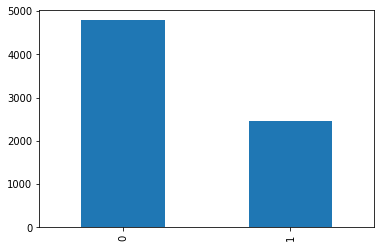

In [ ]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [ ]:
# Feature Engineering

new_df['a1_len'] = new_df['answer1'].str.len() 
new_df['a2_len'] = new_df['answer2'].str.len()

In [ ]:
new_df.head()

,answer1,answer2,is_duplicate,a1_len,a2_len
0,A plane is taking off.,An air plane is taking off.,1,22,27
1,A man is playing a large flute.,A man is playing a flute.,1,31,25
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,1,45,56
3,Three men are playing chess.,Two men are playing chess.,0,28,26
4,A man is playing the cello.,A man seated is playing the cello.,1,27,34


In [ ]:
new_df['a1_num_words'] = new_df['answer1'].apply(lambda row: len(row.split(" ")))
new_df['a2_num_words'] = new_df['answer2'].apply(lambda row: len(row.split(" ")))
new_df.head()

,answer1,answer2,is_duplicate,a1_len,a2_len,a1_num_words,a2_num_words
0,A plane is taking off.,An air plane is taking off.,1,22,27,5,6
1,A man is playing a large flute.,A man is playing a flute.,1,31,25,7,6
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,1,45,56,9,10
3,Three men are playing chess.,Two men are playing chess.,0,28,26,5,5
4,A man is playing the cello.,A man seated is playing the cello.,1,27,34,6,7


In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['answer1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['answer2'].split(" ")))    
    return len(w1 & w2)

In [ ]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,answer1,answer2,is_duplicate,a1_len,a2_len,a1_num_words,a2_num_words,word_common
0,A plane is taking off.,An air plane is taking off.,1,22,27,5,6,4
1,A man is playing a large flute.,A man is playing a flute.,1,31,25,7,6,5
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,1,45,56,9,10,7
3,Three men are playing chess.,Two men are playing chess.,0,28,26,5,5,4
4,A man is playing the cello.,A man seated is playing the cello.,1,27,34,6,7,6


In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['answer1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['answer2'].split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,answer1,answer2,is_duplicate,a1_len,a2_len,a1_num_words,a2_num_words,word_common,word_total
0,A plane is taking off.,An air plane is taking off.,1,22,27,5,6,4,11
1,A man is playing a large flute.,A man is playing a flute.,1,31,25,7,6,5,11
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,1,45,56,9,10,7,18
3,Three men are playing chess.,Two men are playing chess.,0,28,26,5,5,4,10
4,A man is playing the cello.,A man seated is playing the cello.,1,27,34,6,7,6,13


In [ ]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,answer1,answer2,is_duplicate,a1_len,a2_len,a1_num_words,a2_num_words,word_common,word_total,word_share
0,A plane is taking off.,An air plane is taking off.,1,22,27,5,6,4,11,0.36
1,A man is playing a large flute.,A man is playing a flute.,1,31,25,7,6,5,11,0.45
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,1,45,56,9,10,7,18,0.39
3,Three men are playing chess.,Two men are playing chess.,0,28,26,5,5,4,10,0.40
4,A man is playing the cello.,A man seated is playing the cello.,1,27,34,6,7,6,13,0.46


minimum characters 12
maximum characters 367
average num of characters 59


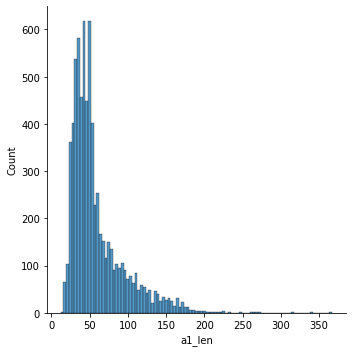

In [ ]:
# Analysis of features
sns.displot(new_df['a1_len'])
print('minimum characters',new_df['a1_len'].min())
print('maximum characters',new_df['a1_len'].max())
print('average num of characters',int(new_df['a1_len'].mean()))

minimum characters 15
maximum characters 311
average num of characters 58


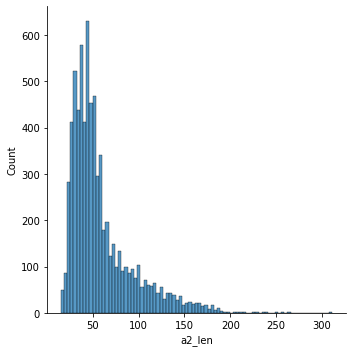

In [ ]:
sns.displot(new_df['a2_len'])
print('minimum characters',new_df['a2_len'].min())
print('maximum characters',new_df['a2_len'].max())
print('average num of characters',int(new_df['a2_len'].mean()))

minimum words 3
maximum words 56
average num of words 10


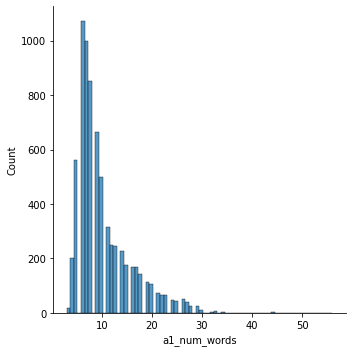

In [ ]:
sns.displot(new_df['a1_num_words'])
print('minimum words',new_df['a1_num_words'].min())
print('maximum words',new_df['a1_num_words'].max())
print('average num of words',int(new_df['a1_num_words'].mean()))

minimum words 2
maximum words 48
average num of words 10


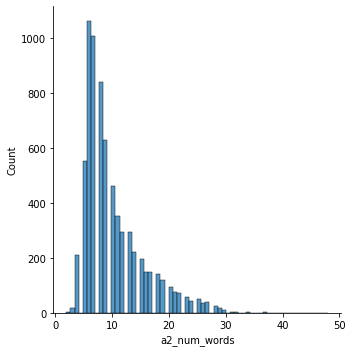

In [ ]:
sns.displot(new_df['a2_num_words'])
print('minimum words',new_df['a2_num_words'].min())
print('maximum words',new_df['a2_num_words'].max())
print('average num of words',int(new_df['a2_num_words'].mean()))

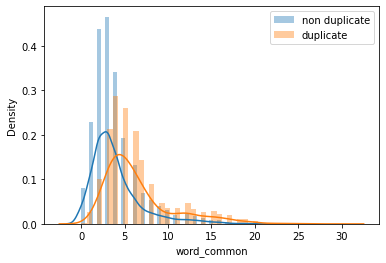

In [ ]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

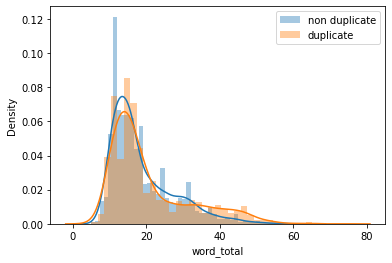

In [ ]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

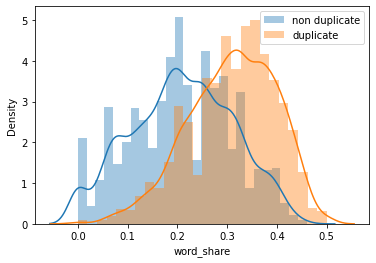

In [ ]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [ ]:
ques_df = new_df[['answer1','answer2']]
ques_df.head()

,answer1,answer2
0,A plane is taking off.,An air plane is taking off.
1,A man is playing a large flute.,A man is playing a flute.
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...
3,Three men are playing chess.,Two men are playing chess.
4,A man is playing the cello.,A man seated is playing the cello.


In [ ]:
final_df = new_df.drop(columns=['answer1','answer2'])
print(final_df.shape)
final_df.head()

(7249, 8)


,is_duplicate,a1_len,a2_len,a1_num_words,a2_num_words,word_common,word_total,word_share
0,1,22,27,5,6,4,11,0.36
1,1,31,25,7,6,5,11,0.45
2,1,45,56,9,10,7,18,0.39
3,0,28,26,5,5,4,10,0.40
4,1,27,34,6,7,6,13,0.46


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['answer1']) + list(ques_df['answer2'])

cv = CountVectorizer(max_features=3000)
a1_arr, a2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(a1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(a2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(7249, 6000)

In [ ]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(7249, 6008)


,is_duplicate,a1_len,a2_len,a1_num_words,a2_num_words,word_common,word_total,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,1,22,27,5,6,4,11,0.36,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,31,25,7,6,5,11,0.45,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,45,56,9,10,7,18,0.39,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,28,26,5,5,4,10,0.40,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,27,34,6,7,6,13,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7558620689655172

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7358620689655172

## Advanced Features
#### 1. Token Features
- cwc_min: This is the ratio of the number of common words to the length of the smaller answer
- cwc_max: This is the ratio of the number of common words to the length of the larger answer
- csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two answers
- csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two answera
- ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two answers
- ctc_max: This is the ratio of the number of common tokens to the larger token count among the two answers
- last_word_eq: 1 if the last word in the two answers is same, 0 otherwise
- first_word_eq: 1 if the first word in the two answers is same, 0 otherwise

#### 2. Length Based Features
- mean_len: Mean of the length of the two answers (number of words)
- abs_len_diff: Absolute difference between the length of the two answers (number of words)
- longest_substr_ratio: Ratio of the length of the longest substring among the two answers to the length of the smaller answers

#### 3. Fuzzy Features
- fuzz_ratio: fuzz_ratio score from fuzzywuzzy
- fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy
- token_sort_ratio: token_sort_ratio from fuzzywuzzy
- token_set_ratio: token_set_ratio from fuzzywuzzy